## Importing Required Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## Loading and Preprocessing Data

In [56]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red["type"] = 1
white["type"] = 0

wines_dataset = pd.concat([red, white], ignore_index=True)
wines_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [57]:
wines_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Plotting Distribution of Alcohol

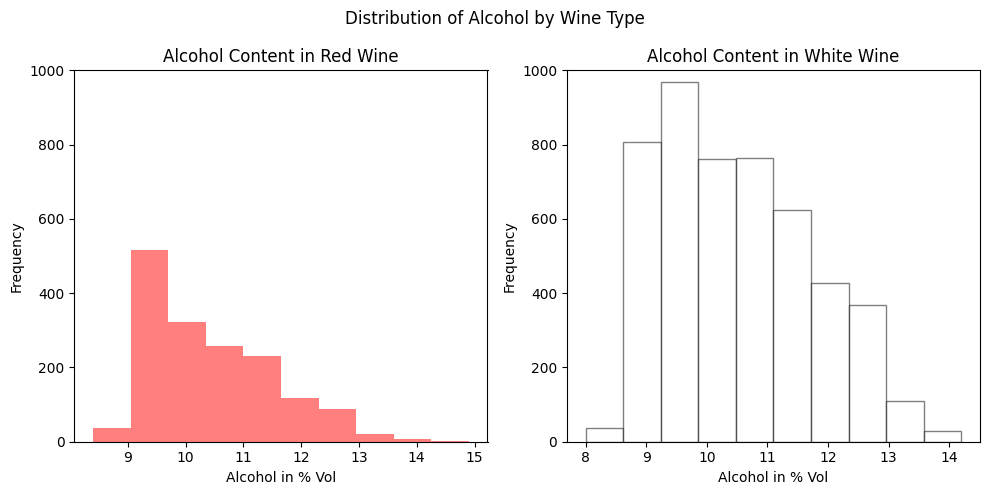

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines_dataset[wines_dataset["type"] == 1].alcohol, bins=10, facecolor="red", alpha=0.5, label="Red Wine")
ax[1].hist(wines_dataset[wines_dataset["type"] == 0].alcohol, bins=10, facecolor="white", alpha=0.5, label="white Wine", edgecolor="black", lw=0.5)

for a in ax:
  a.set_ylim([0, 1000])
  a.set_xlabel('Alcohol in % Vol')
  a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

## Splitting Data into Training and Testing Sets

In [59]:
X = wines_dataset.iloc[: , :-1]
y = wines_dataset.iloc[: , -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

## Creating Neural Network Model

In [61]:
model = Sequential()
model.add(Dense(12, activation="relu", input_dim=12))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model and Making Predictions

In [62]:
model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7659 - loss: 0.5014
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0963
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0592
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0294
Epoch 5/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0255
Epoch 6/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0253
Epoch 7/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9961 - loss: 0.0256
Epoch 8/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9969 - loss: 0.0183
Epoch 9/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0145
Epoch 10/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9971 - loss: 0.0175
Epoch 11/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0176
Epoch 12/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Evaluating the Neural Network Model

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


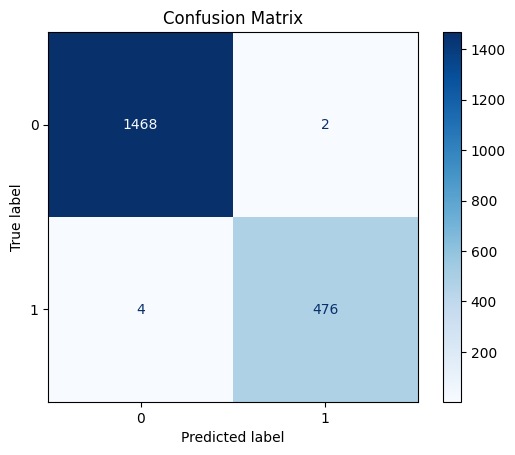

              precision    recall  f1-score   support

           0     0.9973    0.9986    0.9980      1470
           1     0.9958    0.9917    0.9937       480

    accuracy                         0.9969      1950
   macro avg     0.9965    0.9952    0.9958      1950
weighted avg     0.9969    0.9969    0.9969      1950



In [63]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_binary, digits=4))

## Checking for Model Overfitting

In [65]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9967
Test Accuracy: 0.9969
